In [ ]:
#Exploratory Data Analysis & Visualizations

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
# Load the dataset
location_file = ('/content/Adidas US Sales Datasets.xlsx')
df = pd.read_excel(location_file, header=4)
df = df.iloc[:, 1:]


print("Dataset Loaded Successfully")
print("Shape of Dataset:", df.shape)
df.head()

Dataset Loaded Successfully
Shape of Dataset: (9648, 13)


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [ ]:
df['Month'] = df['Invoice Date'].dt.month_name()
df['Year'] = df['Invoice Date'].dt.year

In [ ]:
#Univariate Analysis

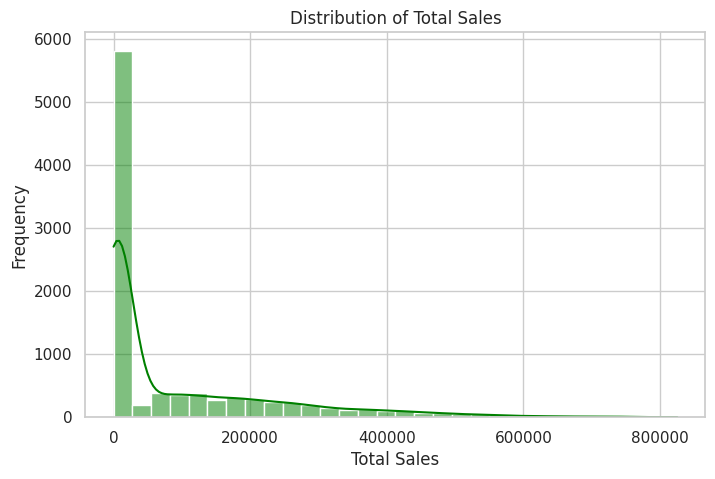

In [ ]:
#Histogram – Total Sales Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Total Sales'], bins=30, kde=True, color='green')
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

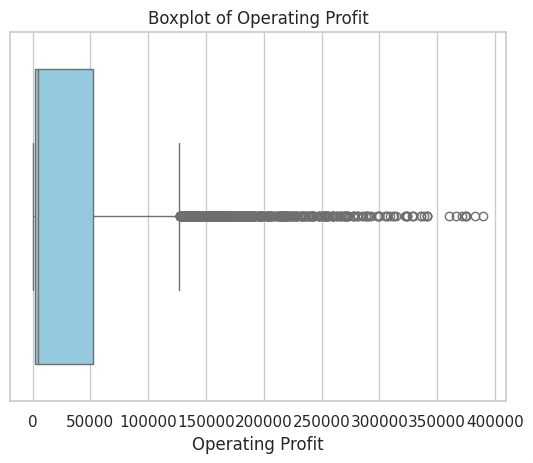

In [ ]:
#Boxplot for Operating Profit

sns.boxplot(x=df['Operating Profit'], color='skyblue')
plt.title("Boxplot of Operating Profit")
plt.show()

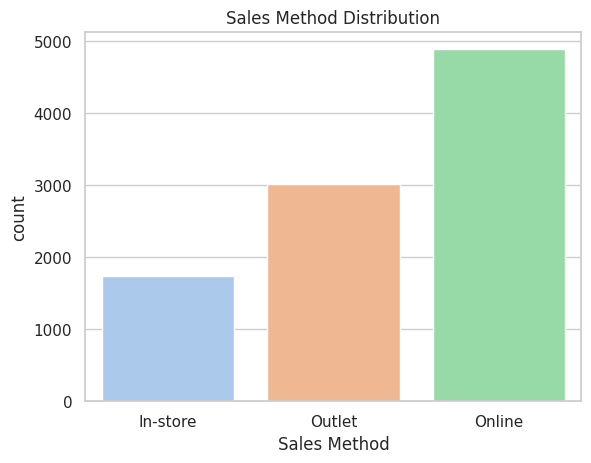

In [ ]:
#Bar plot of Sales Method count

sns.countplot(x='Sales Method', data=df, hue='Sales Method', palette='pastel', legend=False)
plt.title("Sales Method Distribution")
plt.show()

In [ ]:
#Bivariate Analysis

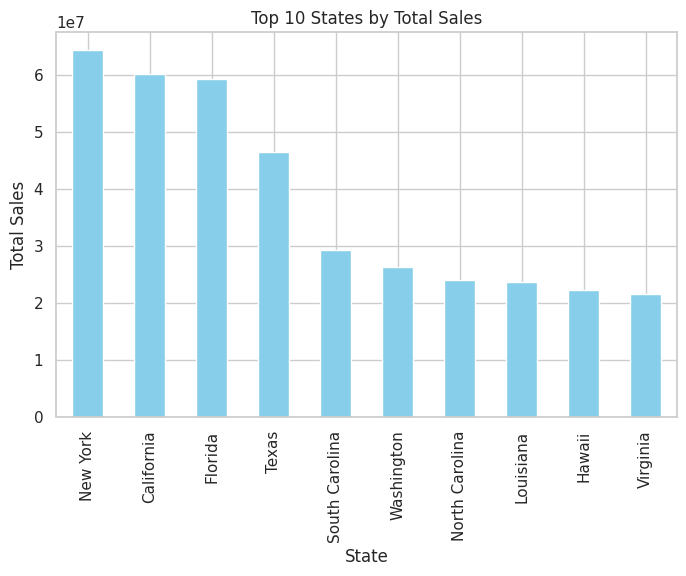

In [ ]:
#Top 10 States by Total Sales

top_states = df.groupby('State')['Total Sales'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Top 10 States by Total Sales")
plt.ylabel("Total Sales")
plt.show()

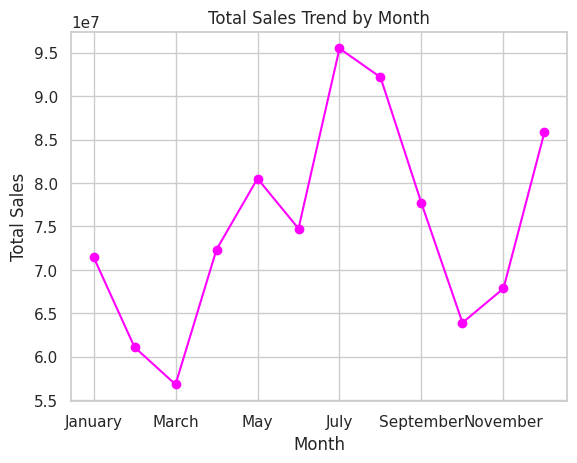

In [ ]:
#Line chart of Total Sales by Month

monthly_sales = df.groupby('Month')['Total Sales'].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
monthly_sales.plot(kind='line', marker='o', color='magenta')
plt.title("Total Sales Trend by Month")
plt.ylabel("Total Sales")
plt.show()

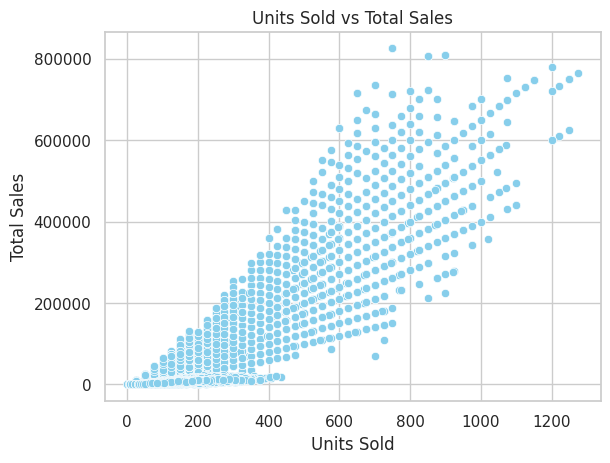

In [ ]:
#Scatter plot of Units Sold vs Total Sales

sns.scatterplot(x='Units Sold', y='Total Sales', data=df, color='skyblue')
plt.title("Units Sold vs Total Sales")
plt.show()

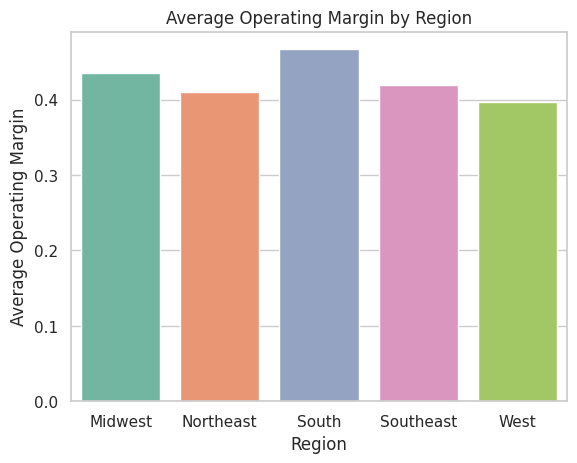

In [ ]:
#Bar plot of Average Operating Margin by Region

region_margin = df.groupby('Region', as_index=False)['Operating Margin'].mean()
sns.barplot(x='Region', y='Operating Margin', data=region_margin, hue='Region', palette='Set2', legend=False)
plt.title("Average Operating Margin by Region")
plt.xlabel("Region")
plt.ylabel("Average Operating Margin")
plt.show()

In [ ]:
#Multivariate Analysis

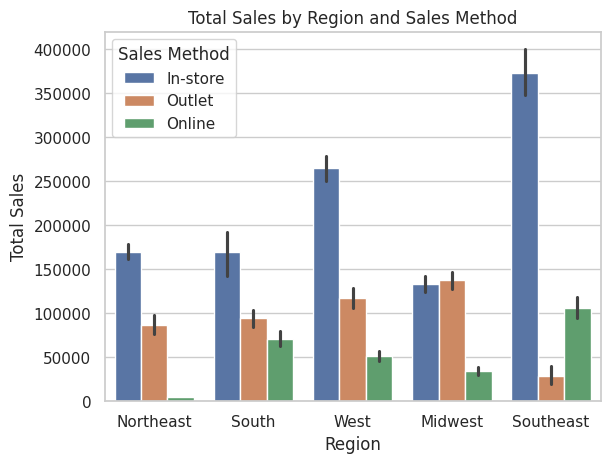

In [ ]:
#Bar chart: Region vs Sales Method vs Total Sales

sns.barplot(x='Region', y='Total Sales', hue='Sales Method', data=df)
plt.title("Total Sales by Region and Sales Method")
plt.show()

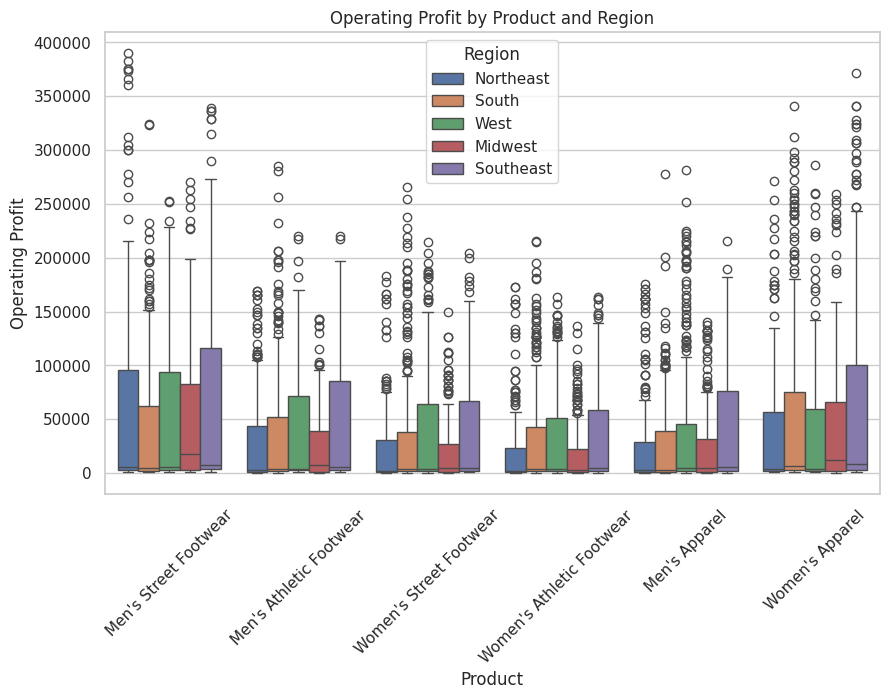

In [ ]:
#Boxplot: Product vs Operating Profit (by Region)

plt.figure(figsize=(10,6))
sns.boxplot(x='Product', y='Operating Profit', hue='Region', data=df)
plt.title("Operating Profit by Product and Region")
plt.xticks(rotation=45)
plt.show()

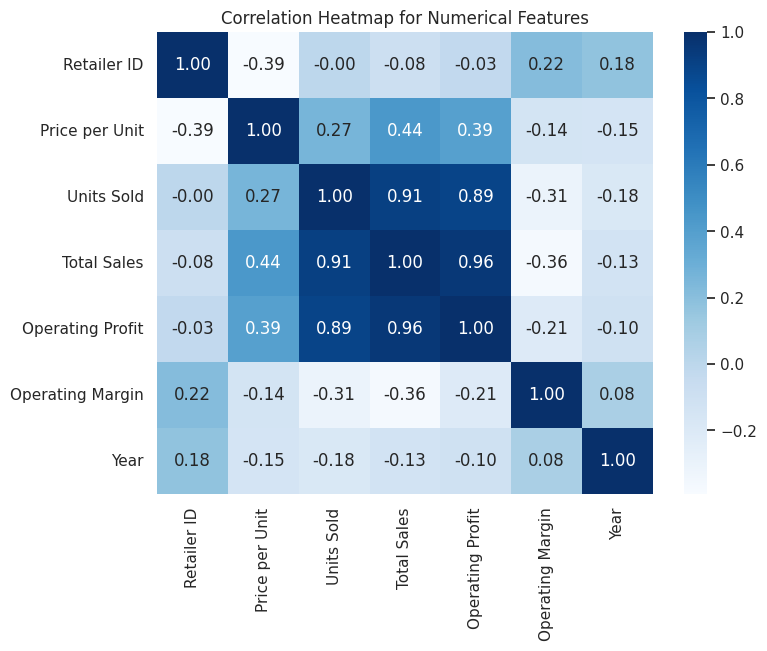

In [ ]:
#Heatmap of correlations (for numeric variables)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

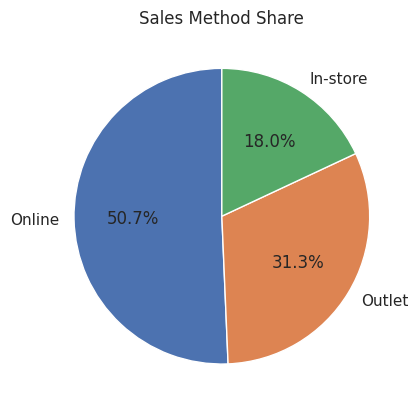

In [ ]:
#Pie Chart for Sales Method share

df['Sales Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Sales Method Share")
plt.ylabel('')
plt.show()

In [ ]:
#Pivot Table: Average profit by Product and Sales Method

pivot = df.pivot_table(values='Operating Profit', index='Product', columns='Sales Method', aggfunc='mean')
display(pivot)

Sales Method,In-store,Online,Outlet
Product,,,
Men's Apparel,60049.828179,15778.416002,28806.131713
Men's Athletic Footwear,68174.307958,19208.551213,32614.525545
Men's Street Footwear,120231.379310,28134.830588,49557.815198
Women's Apparel,90638.362069,25574.968503,42787.765865
Women's Athletic Footwear,46788.362069,14177.167850,27623.397032
Women's Street Footwear,54115.732759,15596.700307,33182.810258


**Key Insights**

**Sales Distribution Shows a Right-Skewed Pattern**

* The histogram of Total Sales reveals that most sales fall within the lower value range, with very few high-value transactions.
* This right-skewed distribution suggests that while a large number of small sales occur frequently, high-value sales are rare but significantly contribute to overall revenue.

**Operating Profit Is Unevenly Distributed with Many Outliers**

* The Operating Profit boxplot shows a strong right-skew, with several high-profit outliers.
* This indicates that a few transactions or regions generate extremely high profits, possibly due to premium product categories or better-performing stores.

**Online Sales Dominate the Market**

From the Sales Method Distribution and Sales Method Share pie chart:

* Online sales account for over 50% of total sales,

* Outlet sales contribute around 31%, and

* In-store sales make up only 18%.

This clearly shows a customer shift toward online shopping, emphasizing the importance of strengthening digital sales channels.

**Strong Positive Correlation Between Units Sold, Total Sales, and Profit**

The correlation heatmap shows:

* A very strong positive relationship between Total Sales and Units Sold (0.91) and between Operating Profit and Total Sales (0.96).

This means that higher sales volumes almost directly lead to higher profits.

However, Operating Margin has a negative correlation with these metrics, meaning that as sales increase, margins tend to shrink — possibly due to discounts or higher costs.

**Regional and Product-Level Performance Varies Widely**

From the Regional and Product Analysis:

* The South region has the highest average operating margin (~0.45).

* The West region shows the lowest (~0.39).

* Men’s Street Footwear and Women’s Apparel perform the best in terms of profit, particularly in the Northeast and Southeast.

* Men’s Apparel and Women’s Athletic Footwear have lower profitability across regions.
This suggests opportunities to improve pricing or marketing for underperforming product segments.

**Monthly Sales Trends Show Seasonality**

The Sales Trend Line Graph shows:

* A dip in March, followed by strong growth peaking in July.

* A decline from July to September, and then a recovery till November.
This pattern could indicate seasonal buying behavior (possibly mid-year promotions or festivals influencing sales).

**Overall Summary**

The analysis reveals several key business insights:

* Most sales come from lower-value transactions, though high-value ones are crucial for total profit.

* Online sales channels dominate, showing the growing importance of e-commerce.

* South and Southeast regions are top performers, while others show room for growth.

* Profit margins tend to fall as sales volumes increase, suggesting a trade-off between growth and profitability.

* Men’s Street Footwear and Women’s Apparel are strong profit drivers, whereas Men’s Apparel needs strategy improvement.

* Sales patterns indicate clear seasonality, which can guide marketing and inventory planning.

---